# VTA - Mini Challenge 1

In dieser Mini Challenge haben Fabian Inderwildi, Elias Bertschinger und Livio Prosdocimo zusammen ein Neuronales Netzwerk "from scratch" (nur mit limitierten packages wie Numpy) erstellt. Grundlage dafür ist der weitbekannte MNIST-Datensatz. Ziel des Projektes war, sich mit den mathematischen Methoden in der Anwendung auseinanderzusetzen, wobei vor allem der Gradient Descent im Vordergrund stand.

## Bibliotheken

Wie bereits erwähnt, wurden keine speziellen Pakete verwendet. Mit matplotlib wurden die Daten visualisiert, mit torchvision haben wir die Daten geladen und mit numpy und random mathematische Konzepte angewendet.

In [38]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torchvision
import torchvision.datasets as datasets

## Aufgabe 1

In der ersten Aufgabe ging es darum, den MNIST-Datensatz zu laden und sich einen Überblick über die Daten zu verschaffen. Der MNIST-Datensatz besteht aus handgeschriebenen Ziffern, die in Trainings- und Testdatensätze aufgeteilt sind. Wir haben die Grösse des Datensatzes erfasst, die Datentypen überprüft und die Verteilung der Ziffern im Datensatz visualisiert. Diese Schritte geben uns eine erste Vorstellung über die Struktur des Datensatzes und die Verteilung der Zahlen.

### Aufgabenstellung 
"Laden Sie das MNIST-Dataset (Training und Test) mithilfe des torchvision-Pakets (Verwenden
Sie das torchvision Paket nur für diese Aufgabe) und verwenden Sie matplotlib, um sich einen
Überblick über die Daten zu verschaffen. Beschreiben Sie die grundlegenden Eigenschaften des
Datensets, z.B. wie viele und welche Daten es enthält und wie diese verteilt sind."

### 1.0 MNIST Datenset herunterladen

Wir verwenden das torchvision-Paket, um den MNIST-Datensatz zu laden. Der Datensatz wird in zwei Teile unterteilt: das Trainingsset und das Testset.

In [39]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

### 1.1 Grösse des Datensatzes erfassen

Anschliessend haben wir die Anzahl der Beispiele im Trainings- und Testdatensatz ermittelt. Der Trainingsdatensatz besteht aus 60'000 Bildern und der Testdatensatz aus 10'000 Bildern. Diese Grössen sind typisch für den MNIST-Datensatz.

In [40]:
print(len(mnist_trainset))
print(len(mnist_testset))

60000
10000


### 1.2 Daten typen des Datensatzes identifizieren

Wir haben auch überprüft, wie die einzelnen Daten im Datensatz strukturiert sind. Der Datensatz besteht aus einem Tuple, das aus einem Bild und der dazugehörigen Ziffer (Label) besteht. 

In [41]:
print(mnist_trainset[0])
print(type(mnist_trainset[0]))

(<PIL.Image.Image image mode=L size=28x28 at 0x1FF16F37290>, 5)
<class 'tuple'>


### 1.3 Daten explorieren

Mit matplotlib haben wir dann zufällige Bilder aus dem Trainings- und Testdatensatz visualisiert. Dies hilft, einen ersten Eindruck von den Daten zu bekommen.

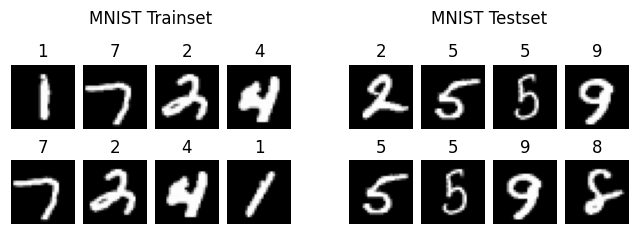

In [42]:
plt.style.use('default')

x_c = 4
y_c = 2

lod = [mnist_trainset, mnist_testset]
los = ["MNIST Trainset", "MNIST Testset"]

fig = plt.figure(figsize=(x_c*2, y_c+0.5))
gs = fig.add_gridspec(2, len(lod), height_ratios=[1,10])

sgs = [[gs[j, i].subgridspec(y_c, x_c, wspace=0.1, hspace=0.5) for i in range(len(lod))] for j in range(2)]

l = random.sample(range(1, len(mnist_testset)), x_c*y_c)

for i in range(len(lod)):
    ax = fig.add_subplot(sgs[0][i][:])
    ax.set_xmargin(0.1)
    ax.axis('off')
    ax.set_title(los[i])
    for x_ax in range(y_c):
        for y_ax in range(x_c):
            fig.add_subplot(sgs[1][i][x_ax, y_ax])
            plt.imshow(lod[i][l[x_ax+y_ax]][0], cmap='gray')
            plt.axis("off")
            plt.title(lod[i][l[x_ax+y_ax]][1])

### 1.4 Verteilung der Daten begutachten

Wir haben die Verteilung der Ziffern im Trainings- und Testdatensatz überprüft, um zu sehen, ob die Zahlen gleichmässig oder ungleichmässig verteilt sind. Die Ziffern im Trainings- und Testdatensatz sind weitgehend gleichmässig verteilt.

In [43]:
numbers = np.arange(10)
count_trainset = [[mnist_trainset[i][1] for i in range(len(mnist_trainset))].count(i) for i in range(10)]
count_testset = [[mnist_testset[i][1] for i in range(len(mnist_testset))].count(i) for i in range(10)]
c_los = ["MNIST Trainset", "MNIST Testset"]

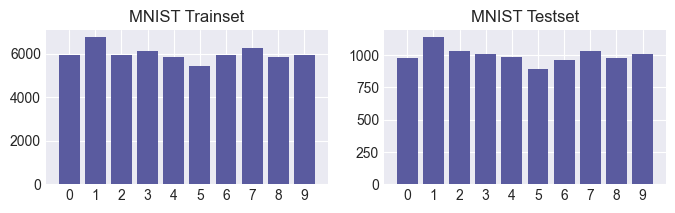

In [44]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')

fig, ax = plt.subplots(1, 2, figsize=(8,2))
for i, v in enumerate([count_trainset, count_testset]):
    ax[i].bar(numbers, v)
    ax[i].set_xticks(numbers)
    ax[i].set_title(c_los[i])
plt.show()

## Aufgabe 2

In dieser Aufgabe haben wir eine Klasse für ein lineares Layer erstellt, das für den Forward-Pass, den Backward-Pass und das Parameter-Update zuständig ist. Der Schwerpunkt lag auf der Implementierung der Gradientenberechnung und der Aktualisierung der Gewichte mithilfe des Gradient Descent. Diese bilden die Grundlage für das Training von neuronalen Netzwerken

### Aufgabenstellung

"Erstellen Sie eine Klasse für ein lineares Layer mit beliebig vielen Knoten. Implementieren Sie
darin getrennte Methoden für Forward-Pass, Backward-Pass und Parameter-Update mithilfe von
numpy. Schreiben Sie geeignete Unittests, um die Funktionsweise dieser Funktionen zu prüfen.
Schreiben Sie insbesondere einen expliziten Test, für ein Layer mit 2 Knoten, welches als Input 2
Datensätzen zu je zwei 2 floats erhält. Wählen Sie dazu unterschiedliche feste Werte für Input,
initiale Gewichte und Lernrate. Dann berechnen sie von Hand die Ergebnisse von Forward,
Backward und Update und testen damit ihre Implementation. Legen Sie die Berechnung der
Ergebnisse ihrer Lösung bei."


### 2.0 Linear Layer erstellen

In [45]:
class Linear_Layer:
    def __init__(self, n_inputs, n_neurons, learning_rate):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros(n_neurons)
        self.learning_rate = learning_rate

    def forward(self, X):
        self.X = X
        return np.dot(X, self.weights) + self.biases
    
    def backward(self, delL_delZ):
        if delL_delZ.ndim == 1:
            delL_delZ = delL_delZ.reshape(1, -1)  
        self.delL_delB = np.mean(delL_delZ, axis=0)  
        self.delL_delW = np.dot(self.X.T, delL_delZ) / self.X.shape[0]
        return np.dot(delL_delZ, self.weights.T)
    
    def update(self):
        self.weights -= self.delL_delW * self.learning_rate
        self.biases -= self.delL_delB * self.learning_rate

### 2.1 Unit Test ausführen

In dieser Phase haben wir Unittests geschrieben, um die korrekte Funktionsweise der Forward-, Backward- und Update-Methoden zu überprüfen.

In [46]:
X = np.array([[1., 1.],
              [1., 2.]])

delC_delZ = np.array([[1., 1.],
                      [1., 2.]])

W = np.array([[1., 1.],
              [1., 2.]])

b = np.array([1., 2.])

calc_Z = np.array([[3, 5],
                   [4, 7]])

calc_delC_delX = np.array([[2, 3],
                           [3, 5]])

calc_delC_delB = np.array([1, 1.5])

calc_delC_delW = np.array([[1, 1.5],
                           [1.5, 2.5]])

calc_new_W = np.array([[0, -0.5],
                       [-0.5, -0.5]])

calc_new_b = np.array([0, 0.5])

l1 = Linear_Layer(2, 2, 1)
l1.weights = W
l1.biases = b
np.testing.assert_almost_equal(l1.forward(X), calc_Z)
np.testing.assert_almost_equal(l1.backward(delC_delZ), calc_delC_delX)
np.testing.assert_almost_equal(l1.delL_delB, calc_delC_delB)
np.testing.assert_almost_equal(l1.delL_delW, calc_delC_delW)
l1.update()
np.testing.assert_almost_equal(l1.weights, calc_new_W)
np.testing.assert_almost_equal(l1.biases, calc_new_b)

## Aufgabe 3

In Aufgabe 3 ging es darum, ein vollständiges neuronales Netzwerk mit einem Hidden Layer zu erstellen. Die Idee war, dass das Netzwerk die Ziffer 5 erkennen soll. Hier haben wir das Netzwerk mit einer Sigmoid-Aktivierungsfunktion im Output und einer geeigneten Verlustfunktion (Binary Cross Entropy) trainiert.

### Aufgabenstellung

"Erstellen Sie ein neuronales Netzwerk mit einem Hidden Linear Layer, wobei die Anzahl von
Input, Hidden und Output Knoten frei gewählt werden kann. Verwenden Sie dazu die in Aufgabe
2 implementierte Klasse. Bereiten Sie die Trainingsloop und alles dafür benötigte vor, um das
Netzwerk darauf zu trainieren, eine von Ihnen gewählte Ziffer (zB 7) korrekt zu identifizieren.
Das heisst, es gibt einen Output Knoten; der Output soll 1 für diese Ziffer und 0 für alle anderen
Ziffern sein. Das Netzwerk soll auf den Trainingsdaten trainieren und auf den Testdaten evaluiert
werden.
Verwenden Sie eine geeignete Kosten-Funktion sowie Evaluations-Funktion und geben Sie deren
mathematische Definition an. Begründen Sie Ihre Wahl dieser Funktion und diskutieren Sie kurz
eine weitere Option für Kosten und Evaluation mit einer Abwägung der Vor- und Nachteile."

Wir haben uns für die Binary Cross-Entropy (BCE) als Verlustfunktion entschieden, da unser Problem eine binäre Klassifikation ist, bei der das Netzwerk entscheiden soll, ob ein Bild die Ziffer "5" zeigt oder nicht. BCE ist speziell für solche Aufgaben geeignet, da sie die Fehler zwischen den Vorhersagen des Modells und den tatsächlichen Labels auf Basis von Wahrscheinlichkeiten misst. Diese Wahrscheinlichkeiten werden im Output-Layer des Netzwerks durch eine Sigmoid-Aktivierungsfunktion erzeugt.
Im Gegensatz dazu wird Mean Squared Error (MSE) normalerweise für Regressionsprobleme verwendet, bei denen kontinuierliche Werte vorhergesagt werden. MSE eignet sich nicht gut für Klassifikationsaufgaben, da sie nicht optimal für die Berechnung von Wahrscheinlichkeiten ist und das Modell in diesem Kontext schlechter trainieren könnte.
Die Categorical Cross-Entropy (CCE) ist für multiklassige Klassifikationen gedacht, bei denen es mehr als zwei Klassen gibt. Da wir jedoch nur zwischen zwei Klassen (5 oder nicht 5) unterscheiden müssen, wäre CCE hier überflüssig und weniger effizient als BCE.
Deshalb ist BCE die beste Wahl für unser binäres Klassifikationsproblem.
4o mini


### 3.0 Aktivierungs-Funktionen definieren

Die Aktivierungsfunktionen wie Sigmoid und ReLU wurden definiert, um die Eingaben zu transformieren.

In [47]:
class Activation:
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)
    
    def activate(self, x, type='sigmoid'):
        if type == 'sigmoid':
            x = np.clip(x, -500, 500)
            return 1 / (1 + np.exp(-x))
        elif type == 'relu':
            return np.maximum(0, x)
        elif type == 'softmax':
            exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
            return exp_x / np.sum(exp_x, axis=1, keepdims=True)
        
    def differentiate(self, x, type='sigmoid'):
        if type == 'sigmoid':
            s = self.sigmoid(x)
            return s * (1 - s)
        elif type == 'relu':
            return np.where(x > 0, 1, 0)

### 3.1 Loss-Funktionen definieren

Es wurden mehrere Verlustfunktionen (z. B. MSE, BCE) definiert, wobei die Binary Cross Entropy als geeignete Verlustfunktion für binäre Klassifizierungsprobleme ausgewählt wurde.

In [48]:
class Loss:

    def CE(self, y_hat, y):
        y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
        return -np.mean(np.sum(y * np.log(y_hat), axis=1))
    
    def CE_derivative(self, y_hat, y):
        y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
        return y_hat - y # Ableitung wenn softmax verwendet wird

    def BCE(self, y_hat, y):
        y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
        return -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    
    def BCE_derivative(self, y_hat, y):
        y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
        #return -((y/y_hat) - ((1-y)/(1-y_hat)))
        return (y_hat - y) / (y_hat * (1 - y_hat))
    
    def MSE(self, y_hat, y):
        return np.mean((y_hat - y)**2)
    
    def MSE_derivative(self, y_hat, y):
        return 2*(y_hat - y)
    
    def calculate(self, y_hat, y, type='MSE'):
        if type == 'MSE':
            return np.mean((y_hat - y)**2)
        elif type == 'BCE':
            y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
            return -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
        elif type == 'CE':
            y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
            return -np.mean(y*np.log(y_hat))
        
    def calculate_derivative(self, y_hat, y, type='MSE'):
        if type == 'MSE':
            return 2*(y_hat - y)
        elif type == 'BCE':
            y_hat = np.clip(y_hat, 1e-7, 1-1e-7)
            return -((y/y_hat) - ((1-y)/(1-y_hat)))
        elif type == 'CE':
            return self.CE_derivative(y_hat, y)

### 3.2 Bauplan für Neuronales Netzwerk erstellen

Das neuronale Netzwerk besteht aus mehreren Schichten: einem oder mehreren Hidden Layers und einem Output Layer. Wir haben die Forward- und Backward-Pässe sowie das Update der Gewichtungen definiert.

In [49]:
class Neural_Network:
    def __init__(self, input_size, hidden_size, output_size, n_hidden_layers=1, learning_rate=0.01, activation_type = 'sigmoid', loss_type = 'MSE'):
        self.activation_type = activation_type
        self.loss_type = loss_type
        self.n_hidden_layers = n_hidden_layers
        self.hidden_layers = [_ for _ in range(n_hidden_layers)]
        self.output_size = output_size
        for i in range(n_hidden_layers):
            self.hidden_layers[i] = Linear_Layer(input_size if i == 0 else hidden_size, hidden_size, learning_rate)
        self.output_layer = Linear_Layer(hidden_size, output_size, learning_rate)

    def forward(self, X):
        self.hidden_layers_outputs_z = [_ for _ in range(self.n_hidden_layers)]
        self.hidden_layers_outputs_a = [_ for _ in range(self.n_hidden_layers)]
        for i in range(self.n_hidden_layers):
            self.hidden_layers_outputs_z[i] = self.hidden_layers[i].forward(X if i == 0 else self.hidden_layers_outputs_a[i - 1])
            self.hidden_layers_outputs_a[i] = Activation().activate(self.hidden_layers_outputs_z[i], self.activation_type)
        self.output_layer_output_z = self.output_layer.forward(self.hidden_layers_outputs_a[self.n_hidden_layers - 1])
        self.output_layer_output_a = Activation().activate(self.output_layer_output_z, 'sigmoid' if self.output_size == 1 else 'softmax')
        return self.output_layer_output_a
        
    def backward(self, y):
        self.delL_delZ_hidden_layers = [_ for _ in range(self.n_hidden_layers+1)]
        self.delL_delZ_hidden_layers[-1] = self.output_layer.backward(Loss().calculate_derivative(self.output_layer_output_a, y, self.loss_type) * (Activation().differentiate(self.output_layer_output_z, 'sigmoid') if self.output_size == 1 else 1))
        for i in range(self.n_hidden_layers):
            self.delL_delZ_hidden_layers[-(i+2)] = self.hidden_layers[-(i+1)].backward(self.delL_delZ_hidden_layers[-(i+1)] * Activation().differentiate(self.hidden_layers_outputs_a[-(i+1)], self.activation_type))

    def update(self):
        for i in range(self.n_hidden_layers):
            self.hidden_layers[i].update()
        self.output_layer.update()

### 3.3 Datenset für training und testing konvertieren

Die Eingabedaten werden normalisiert und als numpy-Arrays vorbereitet, sodass sie vom neuronalen Netzwerk verarbeitet werden können.

In [50]:
X_train = np.array([np.array(i[0]).reshape(-1)/255 for i in mnist_trainset])
y_train = np.array([[1 if i[1] == 7 else 0] for i in mnist_trainset])
X_test = np.array([np.array(i[0]).reshape(-1)/255 for i in mnist_testset])
y_test = np.array([[1 if i[1] == 7 else 0] for i in mnist_testset])

In [51]:
# Training speichern für Visualisierung
losses = []

### 3.4 Neuronales Netzwerk konfigurieren

Wir haben das neuronale Netzwerk mit den entsprechenden Parametern konfiguriert.

Die **Anzahl der versteckten Schichten** (`n_hidden_layer`) gibt an, wie viele Hidden Layers unser Netzwerk enthält. Die **Hidden Size** beschreibt die Anzahl der Neuronen, die in jedem dieser Hidden Layers vorhanden sind. Die **Output Size** steht für die Anzahl der Ausgaben, die das Netzwerk liefert. In diesem Fall ist sie auf 1 gesetzt, da nur eine Zahl (z. B. eine Klassifikation oder eine Vorhersage) erzeugt wird.
 
Die **Learning Rate** bestimmt die Größe der Schritte, die die Backpropagation unternimmt, um den Verlust (Loss) zu minimieren. Wenn die Schritte zu groß sind, könnte es sein, dass das Minimum des Losses nie erreicht wird, was den Lernprozess ineffizient macht. Daher ist es wichtig, verschiedene Lernraten auszuprobieren, um die optimale Rate zu finden.
 
Die **Epochen** geben an, wie oft der gesamte Datensatz durch das Netzwerk verarbeitet wird. Mehr Epochen bedeuten in der Regel mehr Trainingsdurchläufe, was zu einer besseren Anpassung des Modells an die Daten führen kann, solange Überanpassung (Overfitting) vermieden wird.
 
Der **Loss-Typ** und die **Aktivierungsfunktion** (`activation_type`) beschreiben die gewählten Methoden zur Berechnung des Verlusts und der Aktivierung innerhalb des Netzwerks. In diesem Fall wird die **BCE (Binary Cross-Entropy)** als Loss-Funktion verwendet, da sie sich besonders für binäre Klassifikationsaufgaben eignet.
 
Die **Batch Size** gibt an, in wie viele kleinere Gruppen (Batches) die Epochen unterteilt werden. Innerhalb jeder dieser Batches werden die Schritte parallel verarbeitet, um die Trainingszeit zu optimieren und eine stabilere Schätzung des Gradienten zu erreichen.

In [52]:
n_hidden_layer = 1
hidden_size = 8
output_size = 1
learning_rate = 0.01
epochs = 10
batch_size = 128
activation_type = 'sigmoid'
loss_type = 'BCE'

NN = Neural_Network(len(X_train[0]), hidden_size, output_size, n_hidden_layer, learning_rate, activation_type, loss_type)

### 3.5 Neuronales Netzwerk trainieren

Das Netzwerk wird für 10 Epochen trainiert. In jeder Epoche wird das Netzwerk mit einem Mini-Batch von Trainingsdaten gefüttert, und die Gewichtungen werden aktualisiert.

In [53]:
# Training
for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        NN.forward(X_batch)
        NN.backward(y_batch)
        NN.update()

    y_hat_train = NN.forward(X_train)
    loss = Loss().calculate(y_hat_train, y_train, loss_type)
    losses.append(loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.8f}")

    # Shuffle Trainingsdaten
    shuffle = np.random.permutation(len(X_train))
    X_train = X_train[shuffle]
    y_train = y_train[shuffle]

Epoch 1/10, Loss: 0.31742788
Epoch 2/10, Loss: 0.29102419
Epoch 3/10, Loss: 0.25696808
Epoch 4/10, Loss: 0.22246880
Epoch 5/10, Loss: 0.19737013
Epoch 6/10, Loss: 0.18038647
Epoch 7/10, Loss: 0.16869928
Epoch 8/10, Loss: 0.15944419
Epoch 9/10, Loss: 0.15188431
Epoch 10/10, Loss: 0.14566455


### 3.6 Neuronales Netzwerk auswerten

Nach dem Training wird die Genauigkeit des Modells auf den Testdaten berechnet.

In [54]:
y_pred = NN.forward(X_test) >= 0.5
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9582


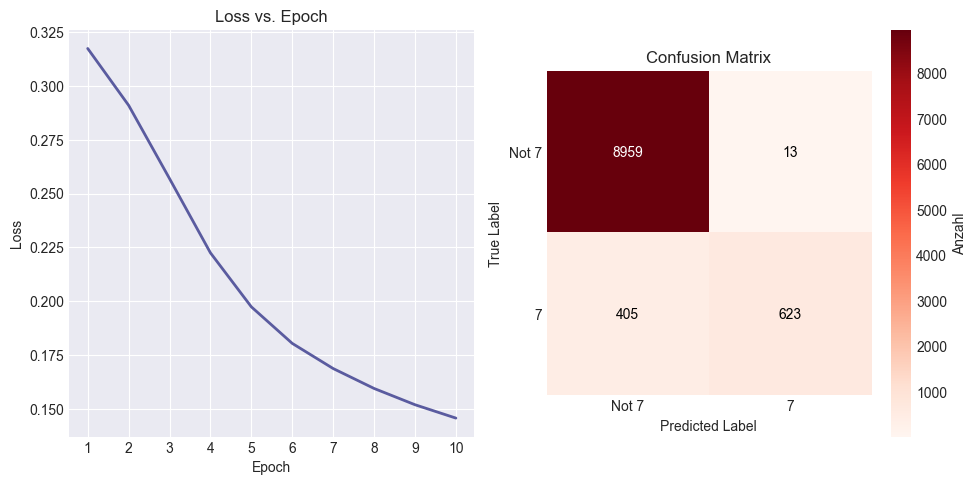

In [55]:
# Vorhersagen für die Testdaten
y_pred_proba = NN.forward(X_test)
y_pred = (y_pred_proba >= 0.5).astype(int)
 
# Berechne die Konfusionstabelle
cm = confusion_matrix(y_test, y_pred)
 
# Visualisierung mit dem angegebenen Stil
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')
 
# Erstelle die Subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
 
# Plot 1: Loss vs. Epoch
ax[0].plot(range(1, epochs+1), losses, linewidth=2, label=f'neurons=8')
ax[0].set_title("Loss vs. Epoch")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_xticks(np.arange(1, epochs+1))
 
# Plot 3: Confusion Matrix
im = ax[1].imshow(cm, interpolation='nearest', cmap='Reds')
ax[1].set_title("Confusion Matrix")
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
tick_marks = np.arange(2)
ax[1].set_xticks(tick_marks)
ax[1].set_yticks(tick_marks)
ax[1].set_xticklabels(['Not 7', '7'])
ax[1].set_yticklabels(['Not 7', '7'])
ax[1].grid(False)
 
# Text im Plot (Zahlen in den Feldern)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = cm[i, j]
        text_color = "white" if value > cm.max() / 2 else "black"
        ax[1].text(j, i, format(value, 'd'),
                   ha="center", va="center",
                   color=text_color)
 
# Farbskala
cbar = plt.colorbar(im, ax=ax[1])
cbar.set_label("Anzahl")
 
# Layout anpassen und anzeigen
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

## Aufgabe 4

In Aufgabe 4 haben wir das neuronale Netzwerk mit verschiedenen Lernraten und Grössen der Hidden Layers trainiert. Wir haben die Entwicklung der Kosten- und Evaluations-Funktionen verfolgt und verschiedene Kombinationen ausprobiert.

Durch die Durchführung von Experimenten mit unterschiedlichen Hyperparametern konnten wir die besten Einstellungen für das Training des Netzwerks ermitteln.

### Aufgabenstellung

"Trainieren Sie das Netzwerk mit verschiedenen Lernraten (0.01 - 1) und Grössen des Hidden
Layers (4, 8, 16) für 10 Epochen. Verfolgen Sie während des Trainings die Entwicklung der Kostenund Evaluations-Funktionen sowohl auf Trainings- als auch auf Testdaten. Interpretieren Sie die
Ergebnisse des Netzwerks und entscheiden Sie, welche Wahl von Lernrate und Hidden Layer-Grösse
die Beste ist. Begründen Sie Ihre Wahl. Diskutieren Sie Probleme im Training und schlagen
Lösungsansätze vor.
(Hinweis: Ziel ist es ein prinzipiell funktionierendes Modell zu entwickeln, sprich, der Trainingsloss
sinkt monoton, um den Trainingsvorgang kennenzulernen und dabei Probleme zu identifizieren
und Lösungsvorschläge zu machen. Es ist nicht das Ziel diese Vorschläge Umzusetzen und ein
optimales Modell zu erstellen.)"

### 4.0 Statische und variable Werte für das Training bestimmen

Die Anzahl der Hidden Layers und die Lernrate wurden in verschiedenen Kombinationen getestet.

In [56]:
n_hidden_layer = 1
output_size = 1
epochs = 10
batch_size = 128

In [57]:
hidden_size = [4, 8, 16]
learning_rate = [0.01, 0.1, 1]
activation_type = ['sigmoid'] # Alternativ ['sigmoid', 'relu']
loss_type = ['BCE'] # Alternativ ['BCE', 'MSE']

### 4.1 Speicher für die Resultate generieren

In [ ]:
x = [i for i in range(1, 11)]
y = np.array([[[[[0.0 for _ in range(epochs)] for _ in range(len(hidden_size))] for _ in range(len(learning_rate))] for _ in range(len(activation_type))] for _ in range(len(loss_type))])
y_acc = np.array([[[[0.0 for _ in range(len(hidden_size))] for _ in range(len(learning_rate))] for _ in range(len(activation_type))] for _ in range(len(loss_type))])
y_cm = np.array([[[[np.zeros((2, 2)) for _ in range(len(hidden_size))] for _ in range(len(learning_rate))] for _ in range(len(activation_type))]for _ in range(len(loss_type))])

### 4.2 Das Neuronale Netzwerk auf verschiedene Konfigurationen tranieren und testen

Wir haben das Netzwerk für verschiedene Kombinationen von Lernraten und Hidden Layer Grössen trainiert.

In [59]:
# Training und Evaluation
for lt in range(len(loss_type)):
    for at in range(len(activation_type)):
        for lr in range(len(learning_rate)):
            for hs in range(len(hidden_size)):
                NN = Neural_Network(len(X_train[0]), hidden_size[hs], output_size, n_hidden_layer,
                                    learning_rate[lr], activation_type[at], loss_type[lt])
               
                for epoch in range(epochs):
                    for i in range(0, len(X_train), batch_size):
                        X_batch = X_train[i:i+batch_size]
                        y_batch = y_train[i:i+batch_size]
                        NN.forward(X_batch)
                        NN.backward(y_batch)
                        NN.update()
                   
                    y_hat = NN.forward(X_train)
                    loss = Loss().calculate(y_hat, y_train, loss_type[lt])
                    y[lt, at, lr, hs][epoch] = loss
                   
                    shuffle = np.random.permutation(len(X_train))
                    X_train = X_train[shuffle]
                    y_train = y_train[shuffle]
               
                # Evaluation auf Testdaten
                y_pred = NN.forward(X_test) >= 0.5
                accuracy = np.mean(y_pred == y_test)
                y_acc[lt, at, lr, hs] = accuracy
               
                # Confusion Matrix berechnen
                y_cm[lt, at, lr, hs] = confusion_matrix(y_test, y_pred, labels=range(2))

### 4.3 Das Training und Testing der verschiedenen Konfigurationen plotten

Die Ergebnisse des Trainings (Loss und Accuracy) wurden für jede Kombination von Hyperparametern graphisch dargestellt.

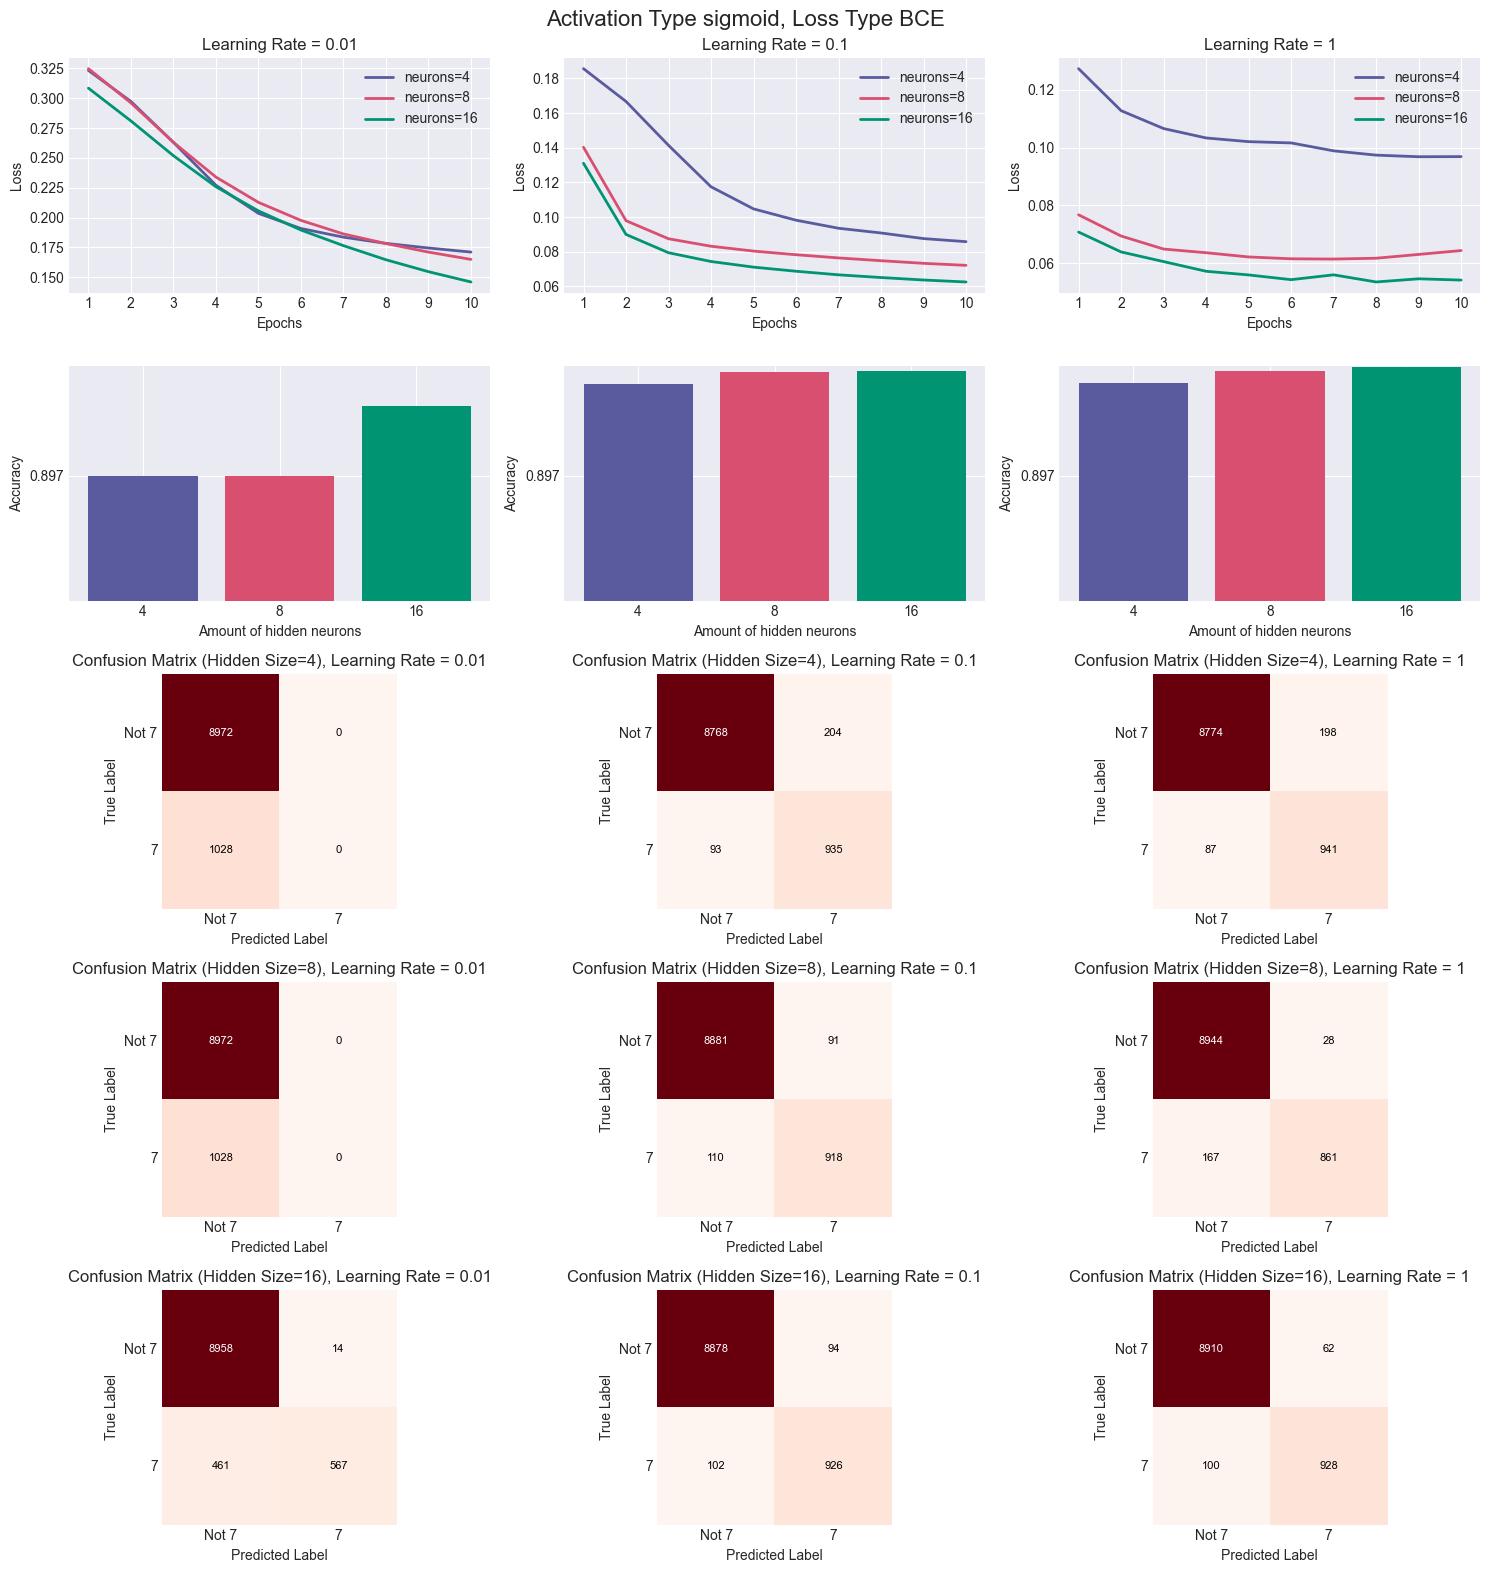

In [60]:
# Visualisierung mit Confusion Matrix für jede Hidden Size
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')
 
for lt in range(len(loss_type)):
    for at in range(len(activation_type)):
        # 5 Reihen: Loss, Accuracy, und 3 Confusion Matrices (für hidden_size=[16,32,64])
        fig, ax = plt.subplots(5, len(learning_rate), figsize=(5*len(learning_rate), 16))
        fig.subplots_adjust(hspace=0.5, wspace=0.5)
        fig.suptitle(f'Activation Type {activation_type[at]}, Loss Type {loss_type[lt]}', fontsize=16)
       
        for lr in range(len(learning_rate)):
            # Loss Plot (Reihe 0)
            for hs in range(len(hidden_size)):
                ax[0][lr].plot(x, y[lt, at, lr, hs], linewidth=2, label=f'neurons={hidden_size[hs]}')
            ax[0][lr].set_title(f'Learning Rate = {learning_rate[lr]}')
            ax[0][lr].set_xlabel("Epochs")
            ax[0][lr].set_ylabel("Loss")
            ax[0][lr].set_xticks(np.arange(1, 11))
            ax[0][lr].legend()
 
            # Accuracy Bar Plot (Reihe 1)
            for hs in range(len(hidden_size)):
                ax[1][lr].bar(x=[str(hidden_size[hs])], height=y_acc[lt, at, lr, hs])
            ax[1][lr].set_yticks(np.round(np.arange(np.min(y_acc), np.max(y_acc)+0.001, 0.1), 3))
            ax[1][lr].set_ylim(np.min(y_acc)-0.1, np.max(y_acc)+0.001)
            ax[1][lr].set_xlabel("Amount of hidden neurons")
            ax[1][lr].set_ylabel("Accuracy")
           
            ## Confusion Matrices für jede Hidden Size (Reihen 2, 3, 4)
            for hs_idx, hs_value in enumerate(hidden_size):
                cm = y_cm[lt, at, lr, hs_idx]
               
                im = ax[2 + hs_idx][lr].imshow(cm, interpolation='nearest', cmap='Reds')
                ax[2 + hs_idx][lr].set_title(f'Confusion Matrix (Hidden Size={hs_value}), Learning Rate = {learning_rate[lr]}')
                ax[2 + hs_idx][lr].set_xlabel("Predicted Label")
                ax[2 + hs_idx][lr].set_ylabel("True Label")
                tick_marks = np.arange(2)
                ax[2 + hs_idx][lr].set_xticks(tick_marks)
                ax[2 + hs_idx][lr].set_yticks(tick_marks)
                ax[2 + hs_idx][lr].set_xticklabels(['Not 7', '7'])
                ax[2 + hs_idx][lr].set_yticklabels(['Not 7', '7'])
                ax[2 + hs_idx][lr].grid(False)
 
                # Text im Plot (Zahlen in den Feldern)
                for i in range(cm.shape[0]):
                    for j in range(cm.shape[1]):
                        value = cm[i, j]
                        text_color = "white" if value > cm.max() / 2 else "black"
                        ax[2 + hs_idx][lr].text(j, i, int(cm[i, j]), ha='center', va='center',
                                                  color=text_color, fontsize=8)
       
        plt.tight_layout()
        plt.subplots_adjust(top=0.95)
        plt.show()

## Aufgabe 5

In Aufgabe 5 haben wir das Netzwerk auf 3 Hidden Layers mit 10 Output-Nodes erweitert. Das Ziel war es, alle Ziffern korrekt zu klassifizieren. Wir haben eine One-Hot-Kodierung für die Labels verwendet und das Netzwerk auf den gesamten MNIST-Datensatz trainiert.

### Aufgabenstellung

"Erweitern Sie das Netzwerk auf 3 Hidden Layer mit gleicher Grösse und 10 Outputs. Das Ziel ist
die korrekte Klassifizierung aller Ziffern. Verwenden Sie eine geeignete Kosten-Funktion sowie
Evaluations-Funktion und geben Sie deren mathematische Definition an. Begründen Sie Ihre Wahl
dieser Funktion und diskutieren Sie kurz eine weitere Optionen für Kosten und Evaluation mit
einer Abwägung der Vor- und Nachteile.
Achten Sie beim Training darauf, nicht auf dem gesamten Datensatz gleichzeitig zu trainieren,
sondern stückeln Sie diesen in kleine Portionen (batches), auf denen nacheinander trainiert wird.
Erläutern Sie kurz, warum diese Veränderung nötig ist.
Variieren Sie die Lernrate (0.001 - 0.1) und die Größe der Hidden Layer (16, 32, 64) und trainieren
jeweils für 10 Epochen. Interpretieren Sie die Ergebnisse des Netzwerks und wählen Sie die beste
Kombination aus. Begründen Sie Ihre Wahl."

In Aufgabe 5 haben wir uns für die Cross-Entropy (CE)-Verlustfunktion entschieden. Diese Wahl wurde getroffen, da die Cross-Entropy insbesondere für Klassifikationsaufgaben geeignet ist, bei denen die Ausgabe als Wahrscheinlichkeiten interpretiert wird. Sie misst den Unterschied zwischen der tatsächlichen Verteilung der Klassen und der vom Modell vorhergesagten Verteilung. Dies ist besonders hilfreich bei der Klassifizierung von mehrdimensionalen Ausgaben, wie es bei der Erkennung der Ziffern im MNIST-Datensatz der Fall ist, wo jede Ziffer eine eigene Klasse darstellt.
Die Cross-Entropy-Verlustfunktion hat sich als äußerst effektiv erwiesen, da sie das Modell direkt für die Wahrscheinlichkeit der korrekten Klasse "belohnt" und Fehler bestraft, was zu einer schnelleren Konvergenz beim Training führt. Alternativen wie MSE (Mean Squared Error) hätten für diese Art von Problem nicht die gleiche Effektivität gezeigt, da sie die Wahrscheinlichkeitsdifferenzen nicht so gut handhaben können, insbesondere bei multi-klassigen Klassifikationen.

### 5.1 Erweiterung des Netzwerks

Das Netzwerk wurde auf 3 Hidden Layers mit 10 Ausgabeknoten erweitert. Die Ausgabe besteht nun aus einer 10-dimensionalen Vektor, der die Wahrscheinlichkeit für jede Ziffer repräsentiert.

In [24]:
X_train = np.array([np.array(i[0]).reshape(-1)/255 for i in mnist_trainset])
y_train = np.eye(10)[np.array([i[1] for i in mnist_trainset])]
X_test = np.array([np.array(i[0]).reshape(-1)/255 for i in mnist_testset])
y_test = np.eye(10)[np.array([i[1] for i in mnist_testset])]

In [25]:
n_hidden_layer = 3
hidden_size = 64
output_size = 10
learning_rate = 0.1

In [26]:
hidden_size = [16, 32, 64]
learning_rate = [0.001, 0.01, 0.1]
activation_type = ['relu'] 
loss_type = ['CE'] 

In [27]:
# Arrays initialisieren
y = np.array([[[[[0.0 for _ in range(epochs)] for _ in range(len(hidden_size))] 
               for _ in range(len(learning_rate))] for _ in range(len(activation_type))] 
             for _ in range(len(loss_type))])

y_acc = np.array([[[[0.0 for _ in range(len(hidden_size))] 
                   for _ in range(len(learning_rate))] for _ in range(len(activation_type))] 
                 for _ in range(len(loss_type))])

# Array für die Confusion Matrices hinzufügen (10x10 für jede Kombination)
y_cm = np.array([[[[np.zeros((10, 10)) for _ in range(len(hidden_size))] 
                  for _ in range(len(learning_rate))] for _ in range(len(activation_type))] 
                for _ in range(len(loss_type))])

### 5.2 Training und Evaluierung

Wir haben die Lernrate und die Größe der Hidden Layers variiert und das Netzwerk für 10 Epochen trainiert.

In [28]:
# Training und Evaluation
for lt in range(len(loss_type)):
    for at in range(len(activation_type)):
        for lr in range(len(learning_rate)):
            for hs in range(len(hidden_size)):
                NN = Neural_Network(len(X_train[0]), hidden_size[hs], output_size, n_hidden_layer, 
                                    learning_rate[lr], activation_type[at], loss_type[lt])
                
                for epoch in range(epochs):
                    for i in range(0, len(X_train), batch_size):
                        X_batch = X_train[i:i+batch_size]
                        y_batch = y_train[i:i+batch_size]
                        NN.forward(X_batch)
                        NN.backward(y_batch)
                        NN.update()
                    
                    y_hat = NN.forward(X_train)
                    loss = Loss().calculate(y_hat, y_train, loss_type[lt])
                    y[lt, at, lr, hs][epoch] = loss
                    
                    shuffle = np.random.permutation(len(X_train))
                    X_train = X_train[shuffle]
                    y_train = y_train[shuffle]
                
                # Evaluation auf Testdaten
                y_pred = NN.forward(X_test)
                y_pred_classes = np.argmax(y_pred, axis=1)  # Klasse mit höchster Wahrscheinlichkeit auswählen
                y_true_classes = np.argmax(y_test, axis=1)  # Wahre Klassen
                
                accuracy = np.mean(y_pred_classes == y_true_classes)
                y_acc[lt, at, lr, hs] = accuracy
                
                # Confusion Matrix berechnen (10x10 für MNIST)
                y_cm[lt, at, lr, hs] = confusion_matrix(y_true_classes, y_pred_classes, labels=range(10))

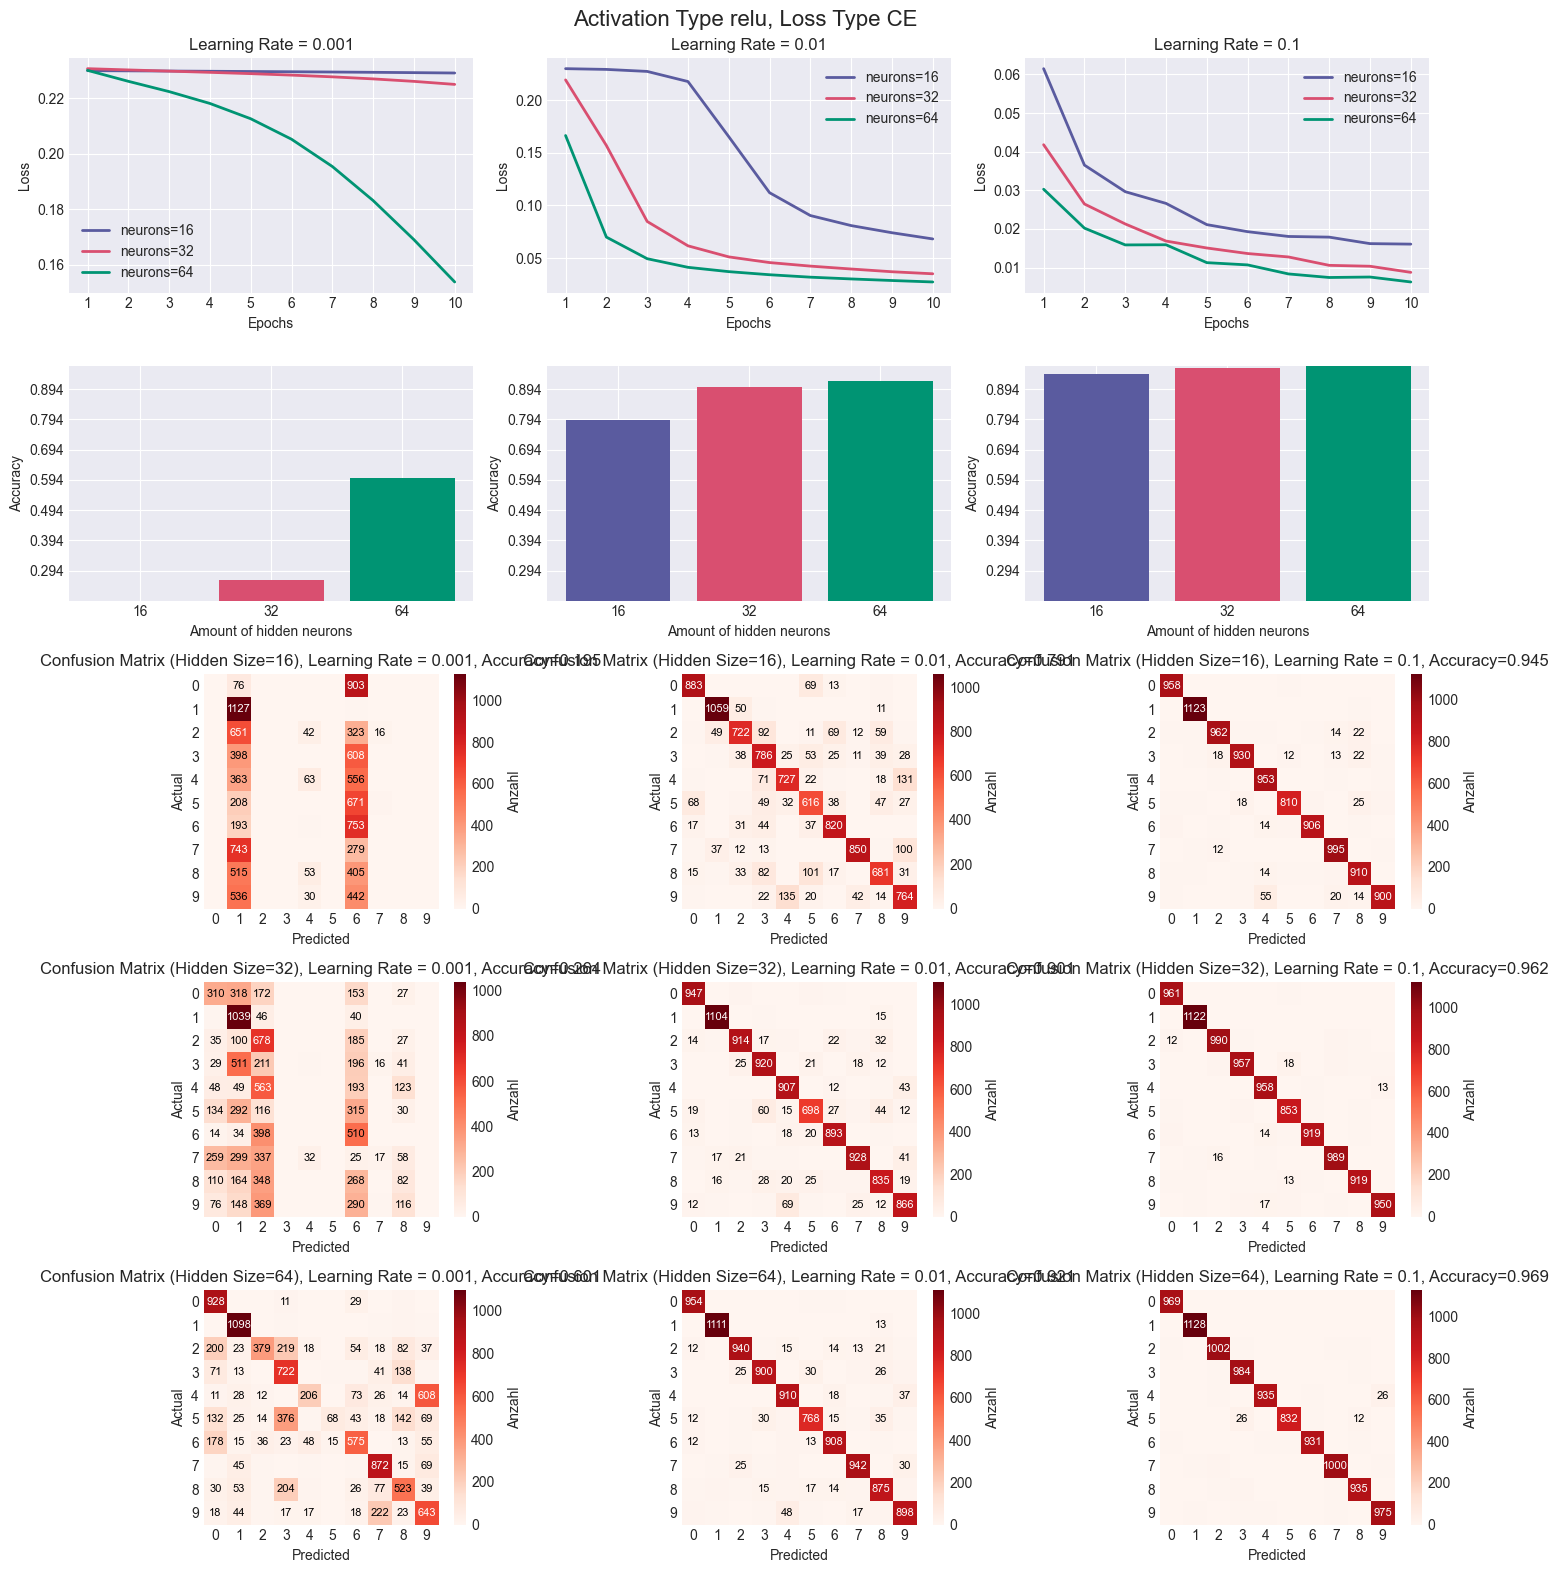

In [29]:
# Visualisierung mit Confusion Matrix für jede Hidden Size
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')

for lt in range(len(loss_type)):
    for at in range(len(activation_type)):
        # 5 Reihen: Loss, Accuracy, und 3 Confusion Matrices (für hidden_size=[16,32,64])
        fig, ax = plt.subplots(5, len(learning_rate), figsize=(5*len(learning_rate), 16))
        fig.subplots_adjust(hspace=0.5, wspace=0.5)
        fig.suptitle(f'Activation Type {activation_type[at]}, Loss Type {loss_type[lt]}', fontsize=16)
        
        for lr in range(len(learning_rate)):
            # Loss Plot (Reihe 0)
            for hs in range(len(hidden_size)):
                ax[0][lr].plot(x, y[lt, at, lr, hs], linewidth=2, label=f'neurons={hidden_size[hs]}')
            ax[0][lr].set_title(f'Learning Rate = {learning_rate[lr]}')
            ax[0][lr].set_xlabel("Epochs")
            ax[0][lr].set_ylabel("Loss")
            ax[0][lr].set_xticks(np.arange(1, 11))
            ax[0][lr].legend()

            # Accuracy Bar Plot (Reihe 1)
            for hs in range(len(hidden_size)):
                ax[1][lr].bar(x=[str(hidden_size[hs])], height=y_acc[lt, at, lr, hs])
            ax[1][lr].set_yticks(np.round(np.arange(np.min(y_acc), np.max(y_acc)+0.001, 0.1), 3))
            ax[1][lr].set_ylim(np.min(y_acc), np.max(y_acc)+0.001)
            ax[1][lr].set_xlabel("Amount of hidden neurons")
            ax[1][lr].set_ylabel("Accuracy")
            
            # Confusion Matrices für jede Hidden Size (Reihen 2, 3, 4)
            for hs_idx, hs_value in enumerate(hidden_size):
                cm = y_cm[lt, at, lr, hs_idx]
                
                im = ax[2 + hs_idx][lr].imshow(cm, interpolation='nearest', cmap='Reds')
                ax[2 + hs_idx][lr].set_title(f'Confusion Matrix (Hidden Size={hs_value}), Learning Rate = {learning_rate[lr]}, Accuracy={y_acc[lt, at, lr, hs_idx]:.3f}')
                ax[2 + hs_idx][lr].set_xlabel("Predicted")
                ax[2 + hs_idx][lr].set_ylabel("Actual")
                ax[2 + hs_idx][lr].set_xticks(np.arange(10))
                ax[2 + hs_idx][lr].set_yticks(np.arange(10))
                ax[2 + hs_idx][lr].grid(False)
                
                # Füge Beschriftungen für die Confusion Matrix hinzu
                for i in range(10):
                    for j in range(10):
                        # Nur Werte > 0 beschriften, um Überfüllung zu vermeiden
                        if cm[i, j] > np.max(cm) * 0.01:  # 1% des Maximalwerts
                            text_color = 'white' if cm[i, j] > np.max(cm)/2 else 'black'
                            ax[2 + hs_idx][lr].text(j, i, int(cm[i, j]), ha='center', va='center', 
                                                  color=text_color, fontsize=8)
                
                # Farbskala hinzufügen
                cbar = plt.colorbar(im, ax=ax[2 + hs_idx][lr], fraction=0.046, pad=0.04)
                cbar.set_label('Anzahl')
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.95)
        plt.show()

## 6 Fazit

Zusammenfassend lässt sich sagen, dass das Projekt sehr viel Zeit in Anspruch genommen hat. Da es aber auch sehr nahe an unserer Tätigkeit liegt und allgemein das Projekt sehr spannend war, sind wir zufrienden und finden die Zeit ist gut investiert. Wenn wir früher gewusst hätten, dass eine Confusion Matrix mit Packages zulässlich ist, hätten wir diese auch noch gerne eingebuat. 

Besonders interessant ist auch , wie die Wahl von Lernrate, Aktivierungsfunktionen und der Anzahl der Hidden Layers die Performance des Netzwerks beeinflusst. Während des Trainings und der Auswertung in den verschiedenen Aufgaben wurde deutlich, dass eine sorgfältige Auswahl dieser Hyperparameter entscheidend für den Erfolg des Modells ist.

### 6.1 Erkenntnisse:
Datenexploration und Visualisierung: Der MNIST-Datensatz ist gut strukturiert, und durch die Visualisierung der Daten konnten wir eine Vorstellung davon bekommen, wie die handgeschriebenen Ziffern aussehen und wie sie im Datensatz verteilt sind. Dies war wichtig, um die Klassifizierungsaufgabe zu verstehen.

Lineare Schichten und Backpropagation: Die Implementierung eines einfachen linearen Layers und die Anwendung des Gradientenabstiegs zur Optimierung der Parameter (Gewichte und Biases) waren zentrale Aufgaben. Besonders interessant war, dass wir durch die Berechnung der Gradienten von Hand und den Vergleich mit den theoretischen Werten sicherstellen konnten, dass die Implementierung korrekt funktioniert.

Neuronales Netzwerk und Aktivierungsfunktionen: Die Verwendung von nicht-linearen Aktivierungsfunktionen wie Sigmoid und ReLU ermöglichte es uns, komplexere Modelle zu erstellen, die in der Lage sind, nicht-lineare Zusammenhänge zu lernen. Die Wahl der richtigen Aktivierungsfunktion und Verlustfunktion hatte einen erheblichen Einfluss auf das Training des Netzwerks und die erzielte Performance.


## 7 Mathematische Methoden in Neuronalen Netzwerken
 
### 1. Forward-Pass
 
Der **Forward-Pass** beschreibt den Prozess, bei dem Eingabedaten durch das neuronale Netzwerk weitergegeben werden, um eine Vorhersage zu erhalten.
 
#### Berechnung der Ausgabe
 
Für eine einzelne Schicht im Netzwerk wird die Ausgabe $ \mathbf{a} $ berechnet, indem eine Gewichtsmatrix $ \mathbf{W} $, eine Eingabe $ \mathbf{x} $ und ein Bias $ \mathbf{b} $ verwendet wird:
 
$ \mathbf{z} = \mathbf{W} \cdot \mathbf{x} + \mathbf{b} $
 
$ \mathbf{a} = f(\mathbf{z}) $
 
- $ \mathbf{W} $: Gewichtsmatrix
- $ \mathbf{x} $: Eingabewerte
- $ \mathbf{b} $: Bias (Abweichung)
- $ \mathbf{z} $: Voraktivierung (lineare Kombination der Eingaben)
- $ \mathbf{a} $: Aktivierung (Ausgabe nach Anwendung der Aktivierungsfunktion $ f $)
 
### 2. Aktivierungsfunktionen
 
Aktivierungsfunktionen werden verwendet, um Nichtlinearität in das Modell zu bringen, was es dem Netzwerk ermöglicht, komplexe Muster zu lernen.
 
#### 2.1 Sigmoid-Funktion
 
Die **Sigmoid-Aktivierungsfunktion** gibt Werte zwischen 0 und 1 zurück, was sie besonders für binäre Klassifizierungsprobleme geeignet macht:
 
$ f(z) = \sigma(z) = \frac{1}{1 + e^{-z}} $
 
Die Ableitung der Sigmoid-Funktion ist:
 
$ \sigma'(z) = \sigma(z) \cdot (1 - \sigma(z)) $
 
#### 2.2 ReLU (Rectified Linear Unit)
 
Die **ReLU-Funktion** gibt den Eingabewert zurück, wenn dieser positiv ist, und null, wenn er negativ ist:
 
$ f(z) = \max(0, z) $
 
Die Ableitung der ReLU-Funktion ist:
 
$ f'(z) = \begin{cases} 0 & \text{wenn } z \leq 0 \\ 1 & \text{wenn } z > 0 \end{cases} $
 
### 3. Kosten- oder Verlustfunktion
 
Die **Verlustfunktion** misst, wie gut das Modell in Bezug auf die tatsächlichen Werte der Daten performt. Sie wird während des Trainings minimiert, um die Fehler zu reduzieren.
 
#### 3.1 Mean Squared Error (MSE)
 
Die **MSE** ist eine häufig verwendete Verlustfunktion, die besonders für Regressionsprobleme geeignet ist:
 
$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred}}^{(i)} - y_{\text{true}}^{(i)})^2 $
 
- $ n $: Anzahl der Datenpunkte
- $ y_{\text{pred}} $: Vorhersage des Modells
- $ y_{\text{true}} $: Wahres Label
 
#### 3.2 Binary Cross-Entropy (BCE)
 
Die **BCE** wird häufig für binäre Klassifizierungsprobleme verwendet, da sie die Wahrscheinlichkeit der Vorhersage gegen die tatsächliche Klasse misst:
 
$ \text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} \left( y_{\text{true}}^{(i)} \log(y_{\text{pred}}^{(i)}) + (1 - y_{\text{true}}^{(i)}) \log(1 - y_{\text{pred}}^{(i)}) \right) $
 
#### 3.3 Categorical Cross-Entropy (CCE)
 
Die **CCE** wird für Multi-Klassen-Klassifizierungsprobleme verwendet, bei denen das Ziel ist, die Wahrscheinlichkeit jeder Klasse zu maximieren:
 
$ \text{CCE} = -\frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_{\text{true}}^{(i,c)} \log(y_{\text{pred}}^{(i,c)}) $
 
- $ n $: Anzahl der Datenpunkte
- $ C $: Anzahl der Klassen
- $ y_{\text{true}}^{(i,c)} $: Wahres Label für Datenpunkt $ i $ und Klasse $ c $
- $ y_{\text{pred}}^{(i,c)} $: Vorhergesagte Wahrscheinlichkeit für Datenpunkt $ i $ und Klasse $ c $

## 8 KI Benutzung

Im Verlauf des Projekts haben wir dreimal auf KI wie ChatGPT zurückgegriffen. Zu Beginn benötigten wir KI, um ein besseres Verständnis für den gesamten Prozess zu erhalten. Wir ließen uns einfache Beispiele zur Backpropagation simulieren und fragten nach einer detaillierten Aufzählung aller relevanten Komponenten des Prozesses.

Zweitens nutzten wir KI-Tools, um unsere Texte zu optimieren. Wie es heutzutage üblich ist, ließen wir KI unsere Texte überprüfen, um sprachliche Fehler zu korrigieren und die Verständlichkeit zu verbessern.

Der dritte Moment, in dem wir KI zur Hilfe zogen, war während des Aufbaus unseres neuronalen Netzwerks. Als das Netzwerk nach intensiver Arbeit und Tests nicht zu lernen schien, standen wir vor einem kritischen Problem. Nachdem wir lange nach einer Lösung gesucht hatten, wandten wir uns an KI-Programme und baten um Unterstützung bei der Fehlersuche im Code. Die KI wies uns darauf hin, dass wir die Ableitung der Sigmoid-Funktion zuerst falsch implementiert hatten, was dazu führte, dass die Backpropagation nicht richtig funktionierte. Dank dieser Erkenntnis konnten wir den Fehler beheben und das Netzwerk erfolgreich zum Laufen bringen.

### 8.1 Beispielchat 1

![Bild.png]("bilder\Bild.png")

![Bild (1).png](<attachment:Bild (1).png>)

![Bild (2).png](<attachment:Bild (2).png>)

![Bild (3).png](<attachment:Bild (3).png>)

### 8.2 Beispielchat 2

![Bild (4).png](<attachment:Bild (4).png>)

![Bild (5).png](<attachment:Bild (5).png>)

## Fazit

Die vorliegende Arbeit im Rahmen der VTA - Mini Challenge 1 von Fabian Inderwildi, Elias Bertschinger und Livio Prosdocimo zeigt eindrucksvoll, wie ein neuronales Netzwerk „from scratch“ unter Verwendung des MNIST-Datensatzes und minimaler Hilfspakete wie NumPy erfolgreich implementiert werden kann. Das Projektziel, die mathematischen Grundlagen neuronaler Netzwerke – insbesondere den Gradientenabstieg – praktisch zu erlernen und anzuwenden, wurde umfassend erreicht.
Die Arbeit gliedert sich in mehrere Aufgaben, die schrittweise aufgebaut sind: Von der Datenexploration und Visualisierung des MNIST-Datensatzes über die Implementierung eines linearen Layers mit Forward- und Backward-Pass bis hin zur Entwicklung eines vollständigen neuronalen Netzwerks mit Hidden Layers zur Erkennung spezifischer Ziffern (z. B. der Ziffer 7) und schliesslich aller Ziffern. Besonders hervorzuheben ist die sorgfältige Implementierung der mathematischen Konzepte wie Aktivierungsfunktionen (Sigmoid, ReLU), Verlustfunktionen (Binary Cross Entropy, Categorical Cross Entropy) und deren Ableitungen, die durch Unittests und manuelle Berechnungen validiert wurden.
Ein zentraler Erkenntnisgewinn des Projekts liegt in der Bedeutung der Hyperparameter wie Lernrate, Anzahl und Größe der Hidden Layers sowie der Wahl der Aktivierungs- und Verlustfunktionen. Die Experimente in Aufgabe 4 und 5 zeigen, dass diese Parameter die Modellleistung erheblich beeinflussen. Während kleinere Lernraten (z. B. 0.01) und moderate Hidden-Layer-Größen (z. B. 8 oder 16) stabile Ergebnisse lieferten, führten extreme Werte (z. B. Lernrate 1) teilweise zu instabilem Training. Die Visualisierung der Ergebnisse mittels Loss-Kurven, Genauigkeitsmetriken und Konfusionsmatrizen unterstützte die Analyse und Interpretation der Modellleistung effektiv. Herausforderungen wie anfängliche Fehler in der Backpropagation (z. B. falsche Ableitung der Sigmoid-Funktion) wurden mithilfe von KI-Unterstützung identifiziert und behoben, was die Lernkurve des Teams zusätzlich steigerte.
Zusammenfassend bietet die Arbeit nicht nur einen tiefen Einblick in die Funktionsweise neuronaler Netzwerke, sondern verdeutlicht auch die Relevanz praktischer Erfahrung und systematischer Fehlersuche. Die Erkenntnisse zur Datenexploration, Modellarchitektur und Hyperparameter-Optimierung bilden eine solide Grundlage für weiterführende Projekte im Bereich maschinellen Lernens. Einzig der nachträgliche Wunsch, eine Konfusionsmatrix mit Packages zu integrieren, deutet auf Optimierungspotenzial im Prozess hin, das jedoch den Gesamterfolg nicht schmälert.